# 1. Getting the data ready

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Three main things we have to do:
    1. Split the data into features and labels (usually call features 'x' and labels 'y')
    2. Filling (also called imputing) or disergarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)
  

In [2]:
heart_disease = pd.read_csv("Datasets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
x = heart_disease.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
x.shape, len(heart_disease)

((303, 13), 303)

In [8]:
# Make sure all of our data is numerical
car_sales = pd.read_csv("Datasets/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [9]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [10]:
# Split into x/y

x = car_sales.drop("Price", axis=1)
y = car_sales.Price

In [11]:
# Split into training/test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20)

In [12]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

In [13]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [14]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors'] # although doors is an integer, it is a categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x
transformed_x.size, print(type(transformed_x)), transformed_x.shape

<class 'numpy.ndarray'>


(13000, None, (1000, 13))

In [15]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [16]:
car_sales.Make.unique().size + car_sales.Colour.unique().size + car_sales.Doors.unique().size # Essentially - we have pivoted the data into flag columns!

12

In [17]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']]) # demonstrating what onehotencoder has done
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [18]:
# let's refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3235867221569877

### Handling missing values:
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether.
Remember - there is no best way to do this. In the real world, just understand what case makes the most sense

In [19]:
# import car sales missing data
car_sales_missing = pd.read_csv('Datasets/car-sales-extended-missing-data.csv')

In [20]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [21]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [22]:
# Before we convert our data into numbers - we should decide what to do with our missing values
# Option 1. Fill missing data with pandas

# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the 'Colour' column
car_sales_missing.Colour.fillna('missing',inplace=True)

# Fill the 'Odometer' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# Fill the 'Doors' column
car_sales_missing.Doors.fillna(4,inplace=True)

In [23]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [24]:
# Price is the column we are trying to predict (our label) so we are just going to remove those rows
car_sales_missing.dropna(inplace=True)

In [25]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [26]:
len(car_sales_missing)

950

In [27]:
# Now we are splitting into features and labels
x = car_sales_missing.drop('Price',axis=1)
y = car_sales.Price

In [28]:
#Now we are encoding string values to numbers
categorical_features = ['Make','Colour','Doors'] # although doors is an integer, it is a categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x
transformed_x.size, print(type(transformed_x)), transformed_x.shape

<class 'numpy.ndarray'>


(15200, None, (950, 16))

In [29]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


Extension: Feature Scaling
Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.
It's called Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

A couple of things to note.

Feature scaling usually isn't required for your target variable.

Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

Extra reading

For further information on this topic, I'd suggest the following resources.

Feature Scaling - why is it required? by Rahul Saini

Feature Scaling with Scikit-Learn by Ben Alex Keen

Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization by Aniruddha Bhandari

Challenge

After reading up on feature scaling, a good idea would be to practice it on one of the problems you're working on and see how it affects the results. If you find anything interesting, be sure to share it.

Thank you to Sid and Shubhamai for suggesting resources. If you have anything you think should be added, please let us know.

In [30]:
# Option 2: Fill missing vaues with sci-kit learn

car_sales_missing = pd.read_csv('Datasets/car-sales-extended-missing-data.csv')

In [31]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
# Always split the data before applying transformations
car_sales_missing.dropna(subset=["Price"], inplace=True)
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']


In [34]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [35]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [36]:
x.isna().sum(), y.isna().sum()

(Make             47
 Colour           46
 Odometer (KM)    48
 Doors            47
 dtype: int64,
 0)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [39]:
# Fill categorical values with 'missing' and numerical values with mean
categorical_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
numerical_imputer = SimpleImputer(strategy='mean')

# Define columns
categorical_features = ['Make','Colour']
door_features = ['Doors']
numerical_features = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
    ('categorical_imputer', categorical_imputer, categorical_features),
    ('door_imputer', door_imputer, door_features),
    ('numerical_imputer', numerical_imputer, numerical_features)
])

# Transform the data
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.fit_transform(x_test)

In [40]:
filled_x_train = pd.DataFrame(filled_x_train,columns=['Make','Colour','Doors','Odometer (KM)'])
filled_x_train

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0
...,...,...,...,...
755,Nissan,Blue,4.0,111256.0
756,Honda,White,4.0,246079.0
757,Honda,Blue,4.0,224900.0
758,missing,White,3.0,19482.0


In [41]:
filled_x_test = pd.DataFrame(filled_x_test,columns=['Make','Colour','Doors','Odometer (KM)'])
filled_x_test

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Red,4.0,133195.0
1,BMW,White,5.0,37513.0
2,Toyota,White,4.0,28809.0
3,Nissan,White,4.0,82429.0
4,Nissan,White,4.0,234161.0
...,...,...,...,...
185,missing,White,4.0,128072.0
186,Toyota,White,4.0,188338.0
187,Toyota,Red,4.0,241987.0
188,Honda,missing,4.0,150582.0


In [42]:
#Now we are encoding string values to numbers
categorical_features = ['Make','Colour','Doors'] # although doors is an integer, it is a categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x_train = transformer.fit_transform(filled_x_train)
transformed_x_test = transformer.transform(filled_x_test)
transformed_x_train.toarray()
transformed_x_test.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33195e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 3.75130e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.88090e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.41987e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.29188e+05]])

In [43]:
type(filled_x_test), type(x_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# 2. Choosing the right model/estimator/algorithm

#### Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problems - prediciting a category (heart disease or not)
    * Sometimes you'll see 'clf' which is short for classifier used a classification estimator
* Regression problems - predicting a number (such as the selling price of a car)

If you're working on a machine learning problem and not sure what model you want to use, refer to the map on their website: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html

In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
import pandas as pd
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
housing_df['MedHouseVal'] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
# Import algorithm
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Setup random seed
np.random.seed(42)
# Create the data
x = housing_df.drop('MedHouseVal', axis = 1)
y = housing_df['MedHouseVal']
# Split into training and test data sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)
# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train,y_train)
# Check the score of the model on the test set
model.score(x_test,y_test) # returns the coefficient of determination - rsquared

0.5758549611440127

In [48]:
# Setup random seed
np.random.seed(42)
# Create the data
x = housing_df.drop('MedHouseVal', axis = 1)
y = housing_df['MedHouseVal']
# Split into training and test data sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)
# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train,y_train)
# Check the score of the model on the test set
model.score(x_test,y_test) # returns the coefficient of determination - rsquared

0.8065734772187598

In [49]:
# Do the similar workflow above for a classification problem

heart_disease = pd.read_csv('Datasets/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
len(heart_disease)

303

In [51]:
# After consulting the map - it has instructed us to use the linearSVC estimator
from sklearn.svm import LinearSVC

# Set the seed
np.random.seed(42)

# Make the data
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train)

#Evaulate the LinearSVC
clf.score(x_test,y_test)

C:\Users\Marlon.Holland\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [52]:
# After consulting the map - it has instructed us to use the linearSVC estimator
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# Make the data
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20)

# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Evaulate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

### Tidbit:
1. If you have structured data, then use ensemble methods
2. If you have unstrucctured data, then use deep learning or transfer learning

# 3. Fit the model/algorithm/estimator and use it to make predictions on our data

### 3.1 Fitting the model to the data

Different Names For:
* x = features, features variables, data
* y = labels, targets, target variables

In [53]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# Make the data
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20)

# Instantiate the model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Evaulate the model
clf.score(x_test,y_test)

0.8524590163934426

In [54]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [55]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. Use the predict() function
2. Use the predict_proba() function

In [56]:
# Use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [59]:
clf.score(x_test,y_test)

0.8524590163934426

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [61]:
# Make predictions with predict_proba()
# Predict_proba() returns probabilities of a classificiation label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [62]:
# Let's predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [63]:
# Predict can also be used for regression models
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop('MedHouseVal',axis=1)
y = housing_df['MedHouseVal']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20)

model = RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)

y_preds = model.predict(x_test)

In [65]:
np.array(y_preds[:10])

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [66]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [67]:
len(y_preds), len(y_test)

(4128, 4128)

In [68]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds) # on average each one of our model's predictions is 0.32 different than the actual value

0.32659871732073664

## 4. Evaluating a Machine Learning Model
Three ways to evaluate Scikit-Learn models/estimators:

    1. Estimator's built in score() method
    2. The scoring parameter
    3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Create train/test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(x_test,y_test) # The score method will change depending on what model/estimator/algorithm you are using

0.8524590163934426

### 4.2 Evaluating a model with the scoring parameter

In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set up random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Create train/test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(x_train,y_train)

RandomForestClassifier()

In [5]:
clf.score(x_test,y_test)

0.8524590163934426

In [6]:
# This is training the model on 5 different versions (splits) of training data, and evaluated on 5 different versions of the test data
np.random.seed(42)
cross_val_score(clf,x,y,cv=5) # Also referred to as k fold validation

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [7]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test,y_test)

# Take the mean of 5-fold cross validation score
clf_crossval_score = np.mean(cross_val_score(clf,x,y,cv=5))

# Compare the two
clf_single_score, clf_crossval_score

(0.8524590163934426, 0.8248087431693989)

In [8]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [9]:
# Scoring parameter set to None by default
np.random.seed(42)
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### 4.2.1 Classification model evaluation metrics
    1. Accuracy
    2. Area under ROC curve
    3. Confusion matrix
    4. Classification report

##### Accuracy

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [11]:
np.mean(cross_val_score)

0.8248087431693989

In [12]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


##### Area under ROC Curve:
    * Area under curve (AUC)
    * ROC Curve
    
ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

A true positive is when the model predicts 1, when the truth is actual 1. A false positive is when the model predicts a 1, when the truth is 0.
A true negative is when the model predicts 0, when the truth is actually 0. A false negative is when the model predicts a 0, when the truth is 1.

In [13]:
# Create X_test... etc.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

# Fit the classifier

clf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [15]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [16]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

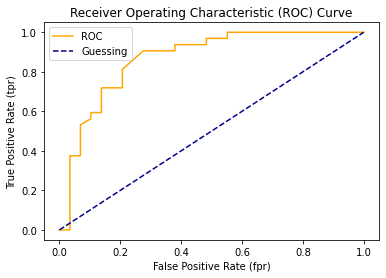

In [17]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model.
    """
    # Plot ROC Curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

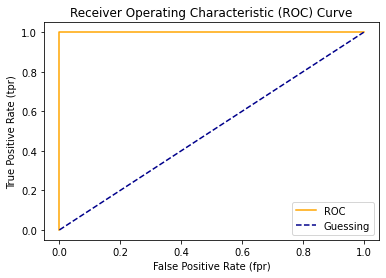

In [19]:
# Plot a perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [20]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

##### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused.

In [21]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [22]:
# Visualization the confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


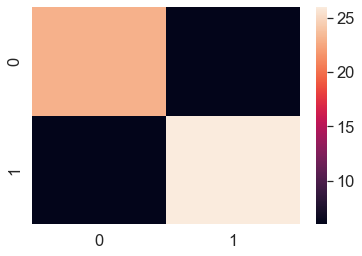

In [23]:
# Make our confusing matrix more visual with Seaborn's heatmap()
# Seaborn is a visualization library built on top of matplotlib
import seaborn as sns

# Set the fontscale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot is using Seaborn
sns.heatmap(conf_mat);

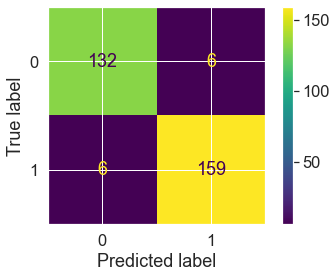

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

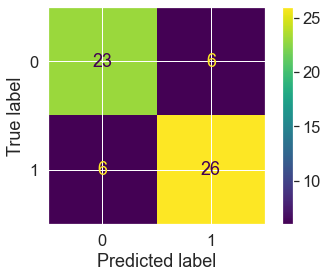

In [25]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds)

##### Classification Report

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [32]:
# Where precision and recall become valueable (compared to just accuracy)
import numpy as np

disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as zero

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\Marlon.Holland\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marlon.Holland\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marlon.Holland\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


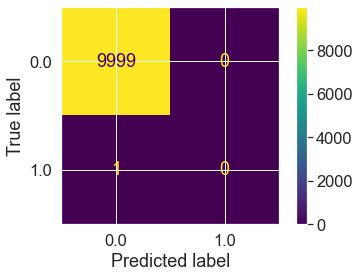

In [33]:
ConfusionMatrixDisplay.from_predictions(y_true = disease_true, y_pred = disease_preds)

### 4.2.2 Regression model evaluation metrics

The ones we are going to cover are:
    
    1. R^2 (pronounced r-squared) or coefficient of determination
    2. Mean absolute error (MAE)
    3. Mean squared error (MSE)

In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
model.score(X_test,y_test)

0.8065734772187598

##### R Squared

In [49]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [50]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [52]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

##### Mean Absolute Error (MAE)

The average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [55]:
from sklearn.metrics import mean_absolute_error

# Grab our predictions first
y_preds = model.predict(X_test)

# Use the mean absolute error function
mean_absolute_error(y_true = y_test, y_pred = y_preds)

0.32659871732073664

In [56]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [57]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [62]:
# This is telling us that on average each one of our predictions is 0.32 +- the actual value

df = pd.DataFrame(data={'Actual Values': y_test,
                  'Predicted Values': y_preds})
df['Differences'] = df['Predicted Values'] - df['Actual Values']


In [63]:
df

,Actual Values,Predicted Values,Differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [67]:
df['MAE'] = df.Differences.abs().mean() # Remember that in this example, we are in the scale of THOUSANDS OF DOLLARS

In [68]:
df

,Actual Values,Predicted Values,Differences,MAE
20046,0.47700,0.493840,0.016840,0.326599
3024,0.45800,0.754940,0.296940,0.326599
15663,5.00001,4.928596,-0.071414,0.326599
20484,2.18600,2.543160,0.357160,0.326599
9814,2.78000,2.331760,-0.448240,0.326599
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.326599
16623,2.66800,1.947760,-0.720240,0.326599
18086,5.00001,4.836378,-0.163632,0.326599
2144,0.72300,0.717820,-0.005180,0.326599


##### Mean Squared Error (MSE)

Mean squared error (MSE) is the mean of the square of the errors between actual and predicted values.

This is going to give more weight to larger values.

In [71]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_preds)

0.2534678520824551

In [72]:
df['Squared Differences'] = df.Differences ** 2

In [73]:
df

,Actual Values,Predicted Values,Differences,MAE,Squared Differences
20046,0.47700,0.493840,0.016840,0.326599,0.000284
3024,0.45800,0.754940,0.296940,0.326599,0.088173
15663,5.00001,4.928596,-0.071414,0.326599,0.005100
20484,2.18600,2.543160,0.357160,0.326599,0.127563
9814,2.78000,2.331760,-0.448240,0.326599,0.200919
...,...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.326599,0.170255
16623,2.66800,1.947760,-0.720240,0.326599,0.518746
18086,5.00001,4.836378,-0.163632,0.326599,0.026775
2144,0.72300,0.717820,-0.005180,0.326599,0.000027


In [74]:
df['MSE'] = df['Squared Differences'].mean()

In [75]:
df

,Actual Values,Predicted Values,Differences,MAE,Squared Differences,MSE
20046,0.47700,0.493840,0.016840,0.326599,0.000284,0.253468
3024,0.45800,0.754940,0.296940,0.326599,0.088173,0.253468
15663,5.00001,4.928596,-0.071414,0.326599,0.005100,0.253468
20484,2.18600,2.543160,0.357160,0.326599,0.127563,0.253468
9814,2.78000,2.331760,-0.448240,0.326599,0.200919,0.253468
...,...,...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.326599,0.170255,0.253468
16623,2.66800,1.947760,-0.720240,0.326599,0.518746,0.253468
18086,5.00001,4.836378,-0.163632,0.326599,0.026775,0.253468
2144,0.72300,0.717820,-0.005180,0.326599,0.000027,0.253468


Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

##### 4.2.3 Finally using the scoring parameter

In [76]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [80]:
# Cross-validation accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=15, scoring=None) # If scoring=none, estimator's default scoring evaluation metric is used
cv_acc

array([0.85714286, 0.85714286, 0.80952381, 0.9       , 0.95      ,
       0.95      , 0.85      , 0.85      , 0.65      , 0.8       ,
       0.65      , 0.85      , 0.7       , 0.75      , 0.8       ])

In [81]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {cv_acc.mean()*100:.2f}%')

The cross-validated accuracy is: 81.49%


In [82]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=15, scoring='accuracy')
cv_acc

array([0.85714286, 0.85714286, 0.80952381, 0.9       , 0.95      ,
       0.95      , 0.85      , 0.85      , 0.65      , 0.8       ,
       0.65      , 0.85      , 0.7       , 0.75      , 0.8       ])

In [83]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {cv_acc.mean()*100:.2f}%')

The cross-validated accuracy is: 81.49%


In [84]:
# Precision
np.random.seed(42)
cv_pre = cross_val_score(clf, X, y, cv=15, scoring='precision')
cv_pre

array([0.78571429, 0.83333333, 0.76923077, 0.90909091, 1.        ,
       1.        , 0.78571429, 1.        , 0.7       , 0.88888889,
       0.7       , 0.78571429, 0.69230769, 0.75      , 0.76923077])

In [87]:
print(f'The cross-validated precision is: {cv_pre.mean()}')

The cross-validated precision is: 0.8246150146150146


In [88]:
# Recall

cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.84848485])

In [89]:
print(f'The cross-validated recall is: {cv_recall.mean()}')

The cross-validated recall is: 0.8484848484848484


##### Using the scoring parameter being used for a regression problem

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

model = RandomForestRegressor()

In [95]:
np.random.seed(42)

cv_r2 = cross_val_score(model,X,y,cv=3)

In [97]:
cv_r2.mean() # Cross validated r squared

0.6545458023124507

In [102]:
np.random.seed(42)

cv_mae = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error') # Uses negative because the higher the return value for the scorer object, the better

In [101]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [103]:
cv_mae.mean()

-0.4835773816036823

In [104]:
np.random.seed(42)

cv_mse = cross_val_score(model,X,y,cv=3,scoring='neg_mean_squared_error') # Uses negative because the higher the return value for the scorer object, the better

In [105]:
cv_mse.mean()

-0.46141356443710196

##### 4.2.4 Using scikit-learn metric functions for evaluating a model
The third way to evaluate sci-kit learn machining learning models/estimates is to use the sklearn.metrics module

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train,y_train)

# Evaluate model using evaluation functions 
y_preds = clf.predict(X_test)

print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1 Score: {f1_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384615


In [112]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

# Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train,y_train)

# Evaluate model using evaluation functions 
y_preds = model.predict(X_test)

print('Regressor metrics on the test set')
print(f'R Squared: {r2_score(y_test, y_preds)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_preds)}')

Regressor metrics on the test set
R Squared: 0.8065734772187598
Mean Absolute Error: 0.32659871732073664
Mean Squared Error: 0.2534678520824551


# 5. Improving a model

First predictions are often referred to as baseline predictions.
The first modeel is often referred to as a baseline model.

Ideally - after you've built your first model - you want to improve upon that model.

From a data perspective:
* Could we collect more data? (generally the more the better)
* Could we improve our data?
    
From a model perspective:
* Is there a better model we could use? Refer to the scikit learn machine learning map.
* Could we improve the *current* model?
    
Parameters are patterns that the model finds in the data.
Hyperparameters are settings on a model you can adjust to *potentially* improve it's ability to find patterns.

Three ways to adjust hyperparameters:
* Adjust them manually by hand/code
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
clf = RandomForestClassifier()

In [3]:
clf.get_params() # These are all hyperparameters that we can adjust on our classifier estimator/model/algorithm

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# The documentation refers to hyperparameters as parameters because they are parameters in python.

### 5.1 Tuning Hyperparameters by Hand

The 3 sets of machine learning:
* Training Set (course materials)
* Validation Set (practice exam)
* Test Set (final exam)

So first - we need to make the 3 sets. Training, validation and test.

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust the following:

    1. max_depth
    2. max_features
    3. min_samples_leaf
    4. min_samples_split
    5. n_estimators

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def clf_evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels on a classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision,2),
                  "recall": round(recall,2),
                  "f1": round(f1,2),}
    print('----Classifier metrics on the test set----')
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    
    return metric_dict

In [9]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("Datasets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
# Splitting data into test, train and validation splits using my method

from sklearn.model_selection import train_test_split

np.random.seed(42)

# Split into x and y
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into training and other 
x_train,x_other,y_train,y_other = train_test_split(x,y,test_size=.3)

# Split other into test and val
x_val,x_test,y_val,y_test = train_test_split(x_other,y_other,test_size=.5)

#Confirm the size
len(x_train.index), len(y_train.index), len(x_test.index),  len(y_test.index), len(x_val.index), len(y_val.index)

(212, 212, 46, 46, 45, 45)

In [21]:
# Splitting data into test, train and validation splits using Udemy's method

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # first 70% of data
val_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

x_train, y_train = x[:train_split], y[:train_split]
x_val, y_val = x[train_split:val_split], y[train_split:val_split]
x_test, y_test = x[val_split:], y[:val_split]

#Confirm the size
len(x_train.index), len(y_train.index), len(x_test.index),  len(y_test.index), len(x_val.index), len(y_val.index)

(212, 212, 46, 257, 45, 45)

In [22]:
clf = RandomForestClassifier()

In [24]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
# Fit on training data as usual
clf.fit(x_train,y_train)

# Make some baseline predictions on the validation split
y_preds = clf.predict(x_val)

# Evaluate the classifier on validation split
baseline_metrics = clf_evaluate_preds(y_val,y_preds)

----Classifier metrics on the test set----
Accuracy: 91.11%
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048


In [54]:
np.random.seed(42)

# Create a new classifier/estimator/algorithm with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200) # Doubled the number of n_estimators

# Fit on training data as usual
clf_2.fit(x_train,y_train)

# Make some baseline predictions on the validation split
y_preds_2 = clf_2.predict(x_val)

# Evaluate the classifier on validation split
clf_2_metrics = clf_evaluate_preds(y_val,y_preds_2)

----Classifier metrics on the test set----
Accuracy: 93.33%
Precision: 0.9090909090909091
Recall: 0.9523809523809523
F1 Score: 0.9302325581395349


### 5.2 Tuning Hyperparameters by Using RandomizedSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10,100,200,500,1000,2000],
       'max_depth': [None,5,10,20,30],
       'max_features': ['auto','sqrt'],
       'min_samples_split': [2,4,6],
       'min_samples_leaf': [1,2,4]}

# Set up your random seed
np.random.seed(42)

# Split into x and y 
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled.target

# Split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

# Instantiate our estimator
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV of clv
rs_clf.fit(x_train,y_train); # Automatically makes our validation sets for us

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [39]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [41]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = clf_evaluate_preds(y_test,rs_y_preds)

----Classifier metrics on the test set----
Accuracy: 80.33%
Precision: 0.8823529411764706
Recall: 0.7894736842105263
F1 Score: 0.8333333333333333


### 5.3 Hyperparameter Tuning with GridSearchCV

In [43]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [44]:
6*5*2*3*3

540

In [45]:
# Reduce the number of hyperparameters to decrease the total runs
grid_2 = {'n_estimators': [100, 200, 1000],
        'max_depth': [None, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [46]:
3*3*2*6*2

216

In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Set up your random seed
np.random.seed(42)

# Split into x and y 
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled.target

# Split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

# Instantiate our estimator
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV of clv
gs_clf.fit(x_train,y_train); # Automatically makes our validation sets for us

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6,

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto

In [50]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [51]:
gs_clf.best_score_

0.8432823129251702

In [53]:
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = clf_evaluate_preds(y_test,gs_y_preds)

----Classifier metrics on the test set----
Accuracy: 78.69%
Precision: 0.8787878787878788
Recall: 0.7631578947368421
F1 Score: 0.8169014084507042


##### Let's compare our different models' metrics

In [58]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})
compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.91,0.93,0.80,0.79
precision,0.90,0.91,0.88,0.88
recall,0.90,0.95,0.79,0.76
f1,0.90,0.93,0.83,0.82


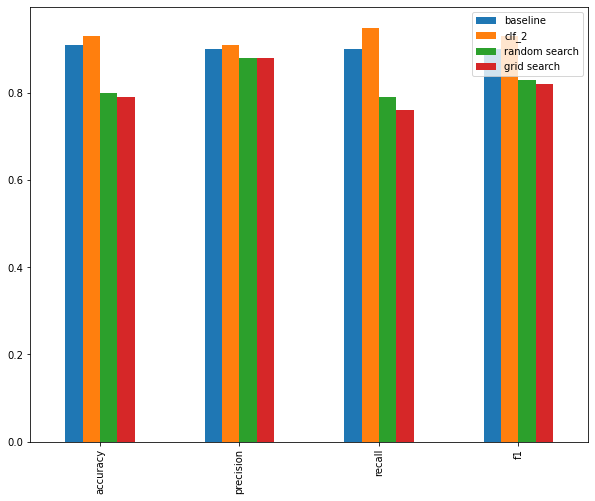

In [60]:
import matplotlib.pyplot as plt

compare_metrics.plot.bar(figsize=(10,8));

In [ ]:
# Remember - hyperparameter tuning is experimental and an art.

##### Another method of tuning your model/estimator/algorithm that was not included in the model:

Forward/Backward Attribute Selection
Correlation Analysis

# 6. Save and load a trained model

Two ways to save and load machine learning models:

    1. With python's pickle module
    2. With the joblib module

##### 6.1 Using pickle

In [11]:
import pickle

# Save an existing model to file
pickle.dump(model,open('housing_regression_model.pkl', 'wb'))

In [12]:
# Load a saved model

loaded_pickle_model = pickle.load(open('housing_regression_model.pkl','rb'))

In [14]:
# Make some preidictions
pickle_y_preds = loaded_pickle_model.predict(x_test)

In [15]:
# You can that evaluate preditions on the imported model and created model just to demonstrate that they are the same model.

##### 6.2 Using joblib

In [16]:
from joblib import dump,load

# Save the model to a file

dump(model, filename='housing_regression_model.joblib')

['housing_regression_model.joblib']

In [17]:
# Load a saved model

loaded_joblib_model = load(filename='housing_regression_model.joblib')

In [18]:
type(loaded_joblib_model)

sklearn.linear_model._ridge.Ridge

In [19]:
type(model)

sklearn.linear_model._ridge.Ridge

In [20]:
joblib_y_preds = loaded_joblib_model.predict(x_test)

# 7. Putting it all together!

In [21]:
import pandas as pd
data = pd.read_csv('Datasets/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [22]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [23]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    
    1. Fill missing data
    2. Convert data into numbers
    3. Build a model on that data

In [28]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('Datasets/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))])

numerical_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

# Setup Preprocessing steps
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_transformer, categorical_features),
                        ('door', door_transformer, door_features),
                        ('num', numeric_transformer, numerical_features)
                    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data
x = data.drop('Price',axis=1)
y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)

# Fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

##### It's also possible to use GridSearchCV or RandomizedSearchCV with our Pipeline

In [31]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean','median'],
    'model__n_estimators': [100,1000],
    'model__max_depth': [None,5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [32]:
gs_model.score(x_test,y_test)

0.3339554263158365